<a href="https://colab.research.google.com/github/nigoda/machine_learning/blob/main/02_Image_classify_of_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Import the fashion MNIST dataset
* Explore the data
* Preprocess the data
* Build the model
  * Set up the layers
  * Compile the model
* Train the model
  * Feed the model
  * Evaluate accuracy
  * Make predictions
  * Verify predictions
* Use the trained model
 





In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


2.3.0


### **Import the Fashion MNIST dataset**

This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

labels----------class
* 0  	T-shirt/top
* 1 	Trouser
* 2 	Pullover
* 3 	Dress
* 4 	Coat
* 5 	Sandal
* 6 	Shirt
* 7 	Sneaker
* 8 	Bag
* 9 	Ankle boot

In [ ]:
class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### **Explore the data**

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

### **Preprocess the data**
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

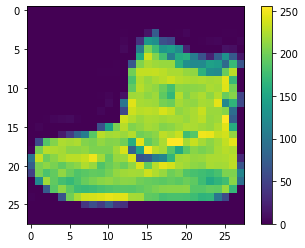

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0


To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

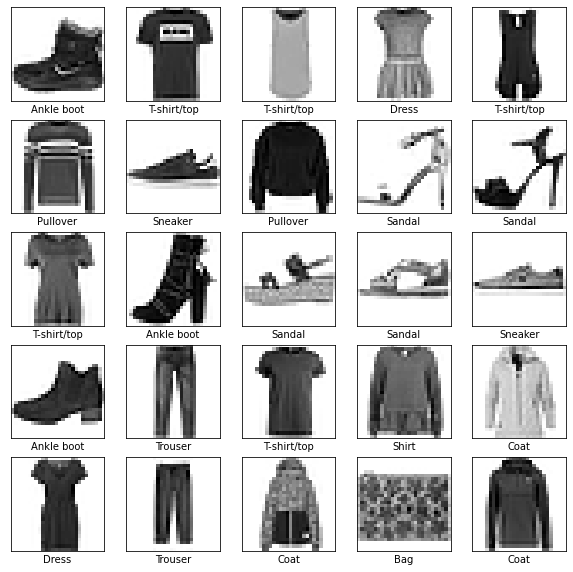

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


### **Build the model**

In [ ]:
#set up the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [ ]:
#Compile the model
#Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

#Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
#Optimizer —This is how the model is updated based on the data it sees and its loss function.
#Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


### **Train the model**


In [ ]:
#Feed the models

model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4922 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3681 - accuracy: 0.8671
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3322 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3113 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2919 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2785 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2568 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2480 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [ ]:
#Evaluate accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy :', test_acc)

313/313 - 0s - loss: 0.3343 - accuracy: 0.8808

Test accuracy : 0.8808000087738037


In [ ]:
#Make predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([6.1688710e-11, 2.0296687e-08, 6.7557776e-13, 1.2055071e-10,
       1.6771705e-10, 8.5695693e-04, 4.3752713e-10, 1.1725686e-02,
       3.8085024e-09, 9.8741734e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

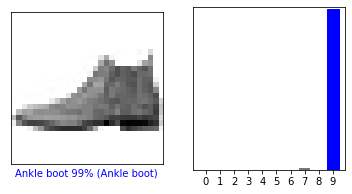

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

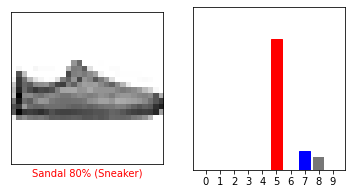

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

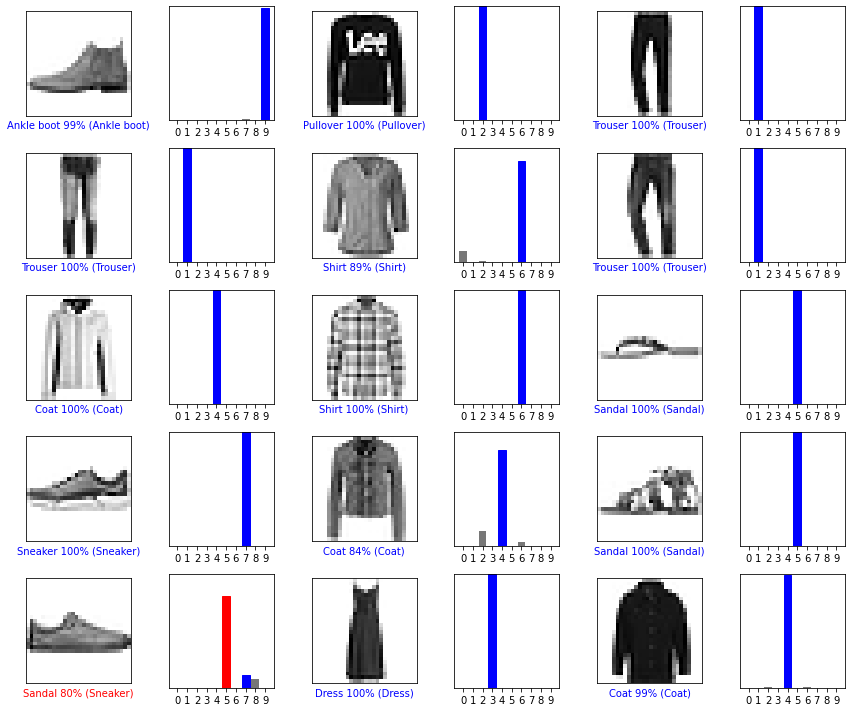

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[150]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[9.0619344e-03 2.1375633e-04 2.0031422e-01 6.0781163e-01 1.3673709e-01
  2.1296541e-06 2.8492611e-02 2.0996924e-06 1.7362112e-02 2.3841965e-06]]


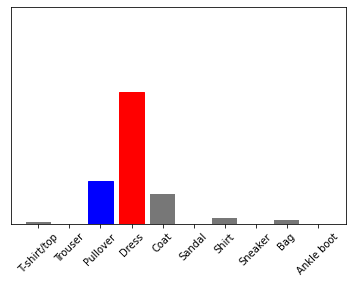

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

3

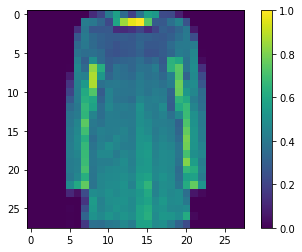

In [ ]:
plt.figure()
plt.imshow(test_images[150])
plt.colorbar()
plt.grid(False)
plt.show()